In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [37]:
animes = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/animes.csv')
animes = animes.drop(labels=['synopsis','genre','episodes','members','img_url','link'], axis=1)
# dropped columns I wasn't interested in
animes = animes.dropna(axis=0, how="any", thresh=None, subset=['score','popularity','ranked'], inplace=False)
# dropped rows with nan values in score, popularity, ranked; 18732 rows -> 16099 rows
# 85.9% of original list of anime remains
animes

,uid,title,aired,popularity,ranked,score
0,28891,Haikyuu!! Second Season,"Oct 4, 2015 to Mar 27, 2016",141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"Oct 10, 2014 to Mar 20, 2015",28,24.0,8.83
2,34599,Made in Abyss,"Jul 7, 2017 to Sep 29, 2017",98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"Jan 6, 2017",502,22.0,8.83
...,...,...,...,...,...,...
19306,32979,Flip Flappers,"Oct 6, 2016 to Dec 29, 2016",843,1070.0,7.73
19307,123,Fushigi Yuugi,"Apr 6, 1995 to Mar 28, 1996",1292,1071.0,7.73
19308,1281,Gakkou no Kaidan,"Oct 22, 2000 to Mar 25, 2001",1314,1073.0,7.73
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,"Dec 21, 2002",1469,1077.0,7.73


In [19]:
animes.describe()
# describe was most useful for looking at score

,uid,popularity,ranked,score
count,16099.000000,16099.000000,16099.000000,16099.000000
mean,19708.608858,7824.361886,6866.524194,6.476478
std,14077.438191,4984.683540,4390.018768,1.044023
min,1.000000,1.000000,1.000000,1.250000
25%,5367.000000,3157.000000,2895.500000,5.780000
50%,19797.000000,7896.000000,6963.000000,6.450000
75%,33776.500000,12257.500000,10601.500000,7.250000
max,40849.000000,16320.000000,14675.000000,9.230000


<AxesSubplot:xlabel='score', ylabel='Count'>

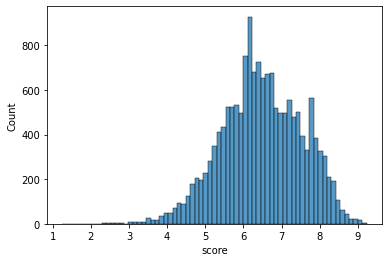

In [21]:
sns.histplot(data=animes, x="score")

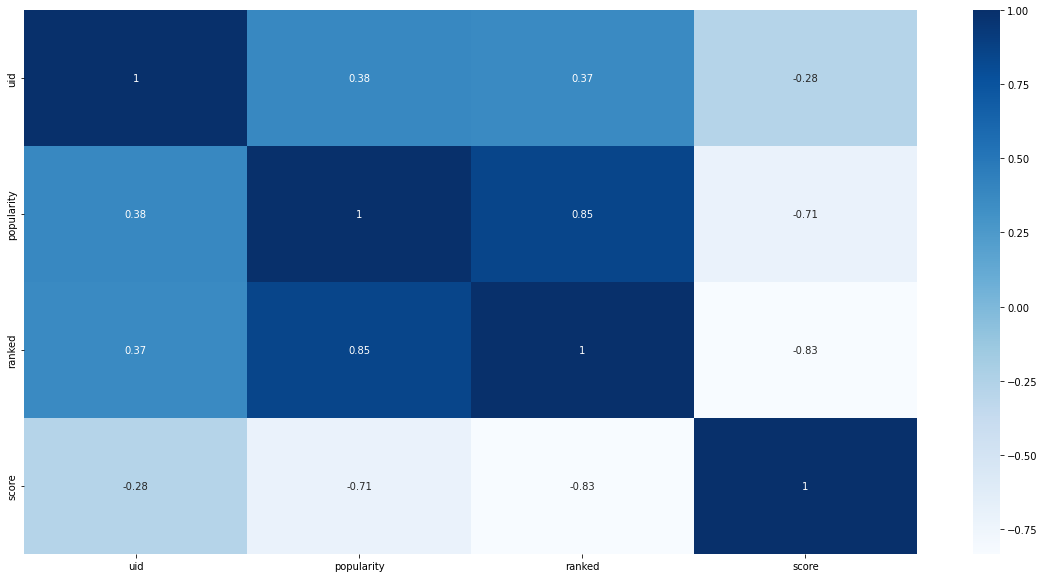

In [22]:
plt.figure(figsize=(20,10))
cor = animes.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
#heatmap to look at correlation; looks like rank and popularity have high correlation of 0.85, which makes sense

In [71]:
profiles = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/profiles.csv')
profiles = profiles.drop(labels=['gender','birthday','link'], axis=1)
# dropped columns I wasn't interested in
profiles = profiles.dropna(axis=0, how="any", inplace=False)
# dropped rows with nan values in any column
# 100% of rows remain
profiles = profiles.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# dropped unecessarily repeated profiles
# 81727 -> 47902 rows, 58.6% of rows remain
profiles = profiles[profiles.favorites_anime != '[]']
# dropped rows with value '[]' in the column favorites_anime, meaning that they had no favorites
# 47902 -> 37478 rows, 78.23% of rows (previous rows, not original set) remain
profiles

,profile,favorites_anime
0,DesolatePsyche,"['33352', '25013', '5530', '33674', '1482', '2..."
1,baekbeans,"['11061', '31964', '853', '20583', '918', '925..."
2,skrn,"['918', '2904', '11741', '17074', '23273', '32..."
3,edgewalker00,"['5680', '849', '2904', '3588', '37349']"
4,aManOfCulture99,"['4181', '7791', '9617', '5680', '2167', '4382..."
...,...,...
77646,WeissYuki,"['36563', '237', '23273', '32979', '23283', '1..."
77651,Akuteru,"['6624', '20785', '17265', '28121']"
77652,Razielek,"['47', '523', '820', '30', '339']"
77654,Mattierial,"['10087', '21327', '585', '28851', '32281', '4..."


In [67]:
reviews = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/reviews.csv')
reviews = reviews.drop(labels=['uid','text','link'], axis=1)
# dropped columns I wasn't interested in
reviews = reviews.dropna(axis=0, how="any", inplace=False)
# dropped rows with nan values in any column; 192112 rows -> 192112 rows
# 100% of rows remain
reviews = reviews.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# dropped unecessarily repeated reviews
# 192112 -> 130519 rows, 67.9% of rows remain
reviews

,profile,anime_uid,score,scores
0,DesolatePsyche,34096,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
1,baekbeans,34599,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
2,skrn,28891,7,"{'Overall': '7', 'Story': '7', 'Animation': '9..."
3,edgewalker00,2904,9,"{'Overall': '9', 'Story': '9', 'Animation': '9..."
4,aManOfCulture99,4181,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
...,...,...,...,...
182629,iHitokage,2593,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
182631,Onegai,2593,7,"{'Overall': '7', 'Story': '6', 'Animation': '9..."
182633,Murasa22,2593,10,"{'Overall': '10', 'Story': '9', 'Animation': '..."
182636,srry4apologizng,2593,9,"{'Overall': '9', 'Story': '5', 'Animation': '1..."


In [69]:
# could create a favorites list based on rankings and predict favorites list?
# could use collaborative filtering to generate list of recommendations based on explicit reaction (score)
# could try to predict scores anime through user ratings

In [85]:
# How do you determine which users or items are similar to one another?
# Given that you know which users are similar, how to determine rating that user would give to item based on ratings of similar users?
# How do you measure the accuracy of the ratings you calculate?

In [84]:
len(reviews.loc[reviews['profile'] == 'baekbeans'].index)
# shows how many animes a user has rated

14

In [80]:
profiles.loc[profiles['profile'] == 'baekbeans'].iat[0,1]
# shows favorite list of baekbeans

"['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']"

In [ ]:
# need to create a function that takes in MAL username and outputs list of recommendations/predicted favorites